## NY Bike 2022 Visualization 1

### Contents:

1. Imports
2. Setting up data
3. Plotting temperature
4. Aggregating Trips
5. Plotting trips and temperature
6. Exports

#### 1. Imports

In [1]:
# Import libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [3]:
# Import data frame

df = pd.read_csv('merged_NY_data.csv', index_col=0)

C:\Users\walls\AppData\Local\Temp\ipykernel_15028\2158320466.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_NY_data.csv', index_col=0)


In [30]:
df.shape

(29838806, 16)

In [5]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

#### 2. Setting up data

In [6]:
# Subset data to avoid memory errors 

df_sample = df.sample(n=1_000_000)

In [7]:
df_sample.shape

(1000000, 16)

In [8]:
# Drop _merge column 

df_sample.drop(columns = {'_merge'}, inplace = True)

In [9]:
df_sample.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
7520565,B52B906436C6B18C,classic_bike,2022-05-21 12:28:18.451,2022-05-21 12:51:10.637,W 10 St & Washington St,5847.06,West St & Liberty St,5184.08,40.733424,-74.008515,40.711444,-74.014847,casual,2022-05-21,21.2
3601558,8C6E21D86DAB443E,classic_bike,2022-03-24 16:59:21.597,2022-03-24 17:04:16.535,W 44 St & 5 Ave,6551.02,8 Ave & W 49 St,6747.07,40.755003,-73.980144,40.761712,-73.986551,member,2022-03-24,5.7
9107125,561FCF6B42270B23,classic_bike,2022-05-30 11:31:24.470,2022-05-30 11:32:36.355,Columbia Heights & Cranberry St,4829.01,Columbia Heights & Cranberry St,4829.01,40.700379,-73.995481,40.700379,-73.995481,casual,2022-05-30,23.3
11039793,7A146533A138A08C,electric_bike,2022-06-29 17:51:13.455,2022-06-29 17:58:44.483,E 51 St & Lexington Ave,6659.01,2 Ave & E 29 St,6122.09,40.757148,-73.972078,40.741724,-73.978093,member,2022-06-29,23.9
25388724,D536AA93C950B45B,electric_bike,2022-10-17 13:31:28.764,2022-10-17 13:35:00.705,W 26 St & 8 Ave,6297.02,W 22 St & 10 Ave,6306.06,40.747397,-73.997393,40.746920,-74.004519,member,2022-10-17,16.6


In [10]:
df_sample.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [11]:
df_sample.describe()

,start_lat,start_lng,end_lat,end_lng,avgTemp
count,1000000.000000,1000000.000000,998711.000000,998711.000000,999980.000000
mean,40.740490,-73.975309,40.740265,-73.975410,17.132698
std,0.038866,0.025805,0.038804,0.025804,8.556519
min,40.633378,-74.027472,40.580000,-74.078900,-11.700000
25%,40.716021,-73.993790,40.715815,-73.993836,11.400000
50%,40.739355,-73.981656,40.739126,-73.981693,17.900000
75%,40.763189,-73.959432,40.763126,-73.959586,24.200000
max,40.882277,-73.881450,40.980000,-73.810000,31.300000


In [12]:
# Change column data type

df_sample['date'] = pd.to_datetime(df['date'])

In [13]:
# Check for NaN values

df_sample[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'avgTemp']].isna().sum()

start_lat       0
start_lng       0
end_lat      1289
end_lng      1289
avgTemp        20
dtype: int64

In [14]:
# Convert to float32 for memory, keep NaNs

df_sample[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'avgTemp']] = (
    df_sample[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'avgTemp']].astype('float32'))

In [15]:
df_sample.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual                 object
date                  datetime64[ns]
avgTemp                      float32
dtype: object

In [16]:
df_sample.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
7520565,B52B906436C6B18C,classic_bike,2022-05-21 12:28:18.451,2022-05-21 12:51:10.637,W 10 St & Washington St,5847.06,West St & Liberty St,5184.08,40.733425,-74.008514,40.711445,-74.014847,casual,2022-05-21,21.200001
3601558,8C6E21D86DAB443E,classic_bike,2022-03-24 16:59:21.597,2022-03-24 17:04:16.535,W 44 St & 5 Ave,6551.02,8 Ave & W 49 St,6747.07,40.755001,-73.980141,40.761711,-73.986549,member,2022-03-24,5.700000
9107125,561FCF6B42270B23,classic_bike,2022-05-30 11:31:24.470,2022-05-30 11:32:36.355,Columbia Heights & Cranberry St,4829.01,Columbia Heights & Cranberry St,4829.01,40.700378,-73.995483,40.700378,-73.995483,casual,2022-05-30,23.299999
11039793,7A146533A138A08C,electric_bike,2022-06-29 17:51:13.455,2022-06-29 17:58:44.483,E 51 St & Lexington Ave,6659.01,2 Ave & E 29 St,6122.09,40.757149,-73.972076,40.741722,-73.978096,member,2022-06-29,23.900000
25388724,D536AA93C950B45B,electric_bike,2022-10-17 13:31:28.764,2022-10-17 13:35:00.705,W 26 St & 8 Ave,6297.02,W 22 St & 10 Ave,6306.06,40.747398,-73.997391,40.746918,-74.004517,member,2022-10-17,16.600000


#### 3. Plotting

In [17]:
#Create df and set index

df_temp = df_sample.set_index('date')

In [18]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-05-21,B52B906436C6B18C,classic_bike,2022-05-21 12:28:18.451,2022-05-21 12:51:10.637,W 10 St & Washington St,5847.06,West St & Liberty St,5184.08,40.733425,-74.008514,40.711445,-74.014847,casual,21.200001
2022-03-24,8C6E21D86DAB443E,classic_bike,2022-03-24 16:59:21.597,2022-03-24 17:04:16.535,W 44 St & 5 Ave,6551.02,8 Ave & W 49 St,6747.07,40.755001,-73.980141,40.761711,-73.986549,member,5.700000
2022-05-30,561FCF6B42270B23,classic_bike,2022-05-30 11:31:24.470,2022-05-30 11:32:36.355,Columbia Heights & Cranberry St,4829.01,Columbia Heights & Cranberry St,4829.01,40.700378,-73.995483,40.700378,-73.995483,casual,23.299999
2022-06-29,7A146533A138A08C,electric_bike,2022-06-29 17:51:13.455,2022-06-29 17:58:44.483,E 51 St & Lexington Ave,6659.01,2 Ave & E 29 St,6122.09,40.757149,-73.972076,40.741722,-73.978096,member,23.900000
2022-10-17,D536AA93C950B45B,electric_bike,2022-10-17 13:31:28.764,2022-10-17 13:35:00.705,W 26 St & 8 Ave,6297.02,W 22 St & 10 Ave,6306.06,40.747398,-73.997391,40.746918,-74.004517,member,16.600000


In [19]:
df_temp.describe()

,start_lat,start_lng,end_lat,end_lng,avgTemp
count,1000000.000000,1000000.000000,998711.000000,998711.000000,999980.000000
mean,40.740486,-73.975327,40.740253,-73.975395,17.132698
std,0.038866,0.025805,0.038804,0.025804,8.556520
min,40.633377,-74.027473,40.580002,-74.078903,-11.700000
25%,40.716022,-73.993790,40.715816,-73.993835,11.400000
50%,40.739357,-73.981659,40.739124,-73.981697,17.900000
75%,40.763187,-73.959435,40.763126,-73.959587,24.200001
max,40.882278,-73.881447,40.980000,-73.809998,31.299999


<Axes: title={'center': 'Temperatures Daily 2022'}, xlabel='date'>

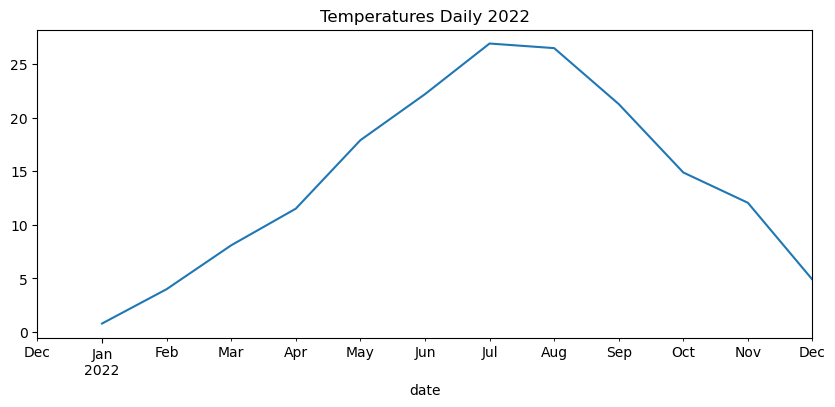

In [20]:
# downsample data by monthly average to avoid overflow error

# Plot avgTemp with pandas

df_temp.resample('ME').mean(numeric_only=True)['avgTemp'].plot(figsize=(10,4), title='Temperatures Daily 2022')

#### 4. Aggregate Trips

In [21]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df_sample.groupby(['date'])['ride_id'].count()).reset_index()

In [22]:
df_group.head()

,date,ride_id
0,2021-12-28,1
1,2021-12-31,19
2,2022-01-01,673
3,2022-01-02,1484
4,2022-01-03,1115


In [23]:
df_group.shape

(367, 2)

In [24]:
# Adjust data to plot bike trips data

# Get rides per day
df_group.rename(columns = {'ride_id':'rides_daily'}, inplace = True)
# Merge back to main df
df_sample = df_sample.merge(df_group, on = "date", how = 'outer', indicator = True)

In [25]:
# Check df changes 

print(df_sample['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df_sample[df_sample['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df_sample[df_sample['date'] == '2018-01-02'].shape) # Second check 

df_temp = df_sample.set_index('date')

print(df_temp.columns)

_merge
both          1000000
left_only           0
right_only          0
Name: count, dtype: int64
Shape of January 1st is (0, 17)
Shape of January 2nd is (0, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'rides_daily', '_merge'],
      dtype='object')


In [26]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,rides_daily,_merge
date,,,,,,,,,,,,,,,,
2021-12-28,DA14E2F38543A9FF,classic_bike,2021-12-28 12:17:45.393,2022-01-01 11:07:06.792,Southpoint Park,6566.01,NaN,NaN,40.753700,-73.958649,NaN,NaN,casual,NaN,1,both
2021-12-31,23643AF38D9D91ED,classic_bike,2021-12-31 09:49:35.149,2022-01-01 10:49:15.878,W 47 St & 10 Ave,6824.07,NaN,NaN,40.762699,-73.993011,NaN,NaN,casual,NaN,19,both
2021-12-31,53B738C6594CC191,electric_bike,2021-12-31 23:51:45.918,2022-01-01 00:20:15.060,Broadway & W 61 St,7014.12,E 88 St & 1 Ave,7235.13,40.770031,-73.981972,40.778301,-73.948814,casual,NaN,19,both
2021-12-31,2065757132FE97C0,classic_bike,2021-12-31 23:58:39.100,2022-01-01 00:01:02.766,W 47 St & 10 Ave,6824.07,W 49 St & 8 Ave,6747.06,40.762699,-73.993011,40.762272,-73.987885,casual,NaN,19,both
2021-12-31,FD0283A8C2A6FAEF,electric_bike,2021-12-31 23:51:27.961,2022-01-01 00:16:04.623,Wythe Ave & Metropolitan Ave,5348.02,DeKalb Ave & Franklin Ave,4528.01,40.716888,-73.963196,40.690647,-73.957458,member,NaN,19,both


#### 5. Plotting trips and temperature

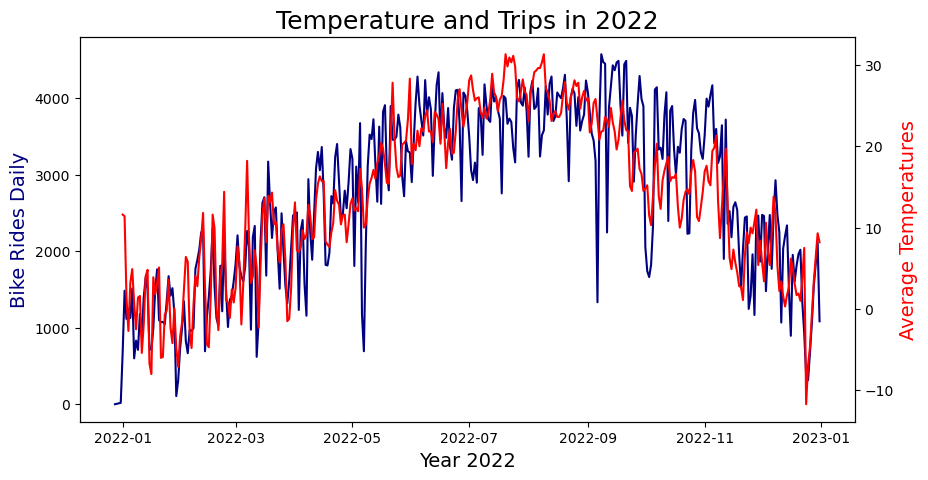

In [27]:
# Plot both temp and trips

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike Rides Daily",color = "navy", fontsize = 14) # set y-axis label

# Initialize a twin axis for
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_temp['avgTemp'], color = "red")
ax2.set_ylabel("Average Temperatures", color = "red",fontsize=14)
plt.title('Temperature and Trips in 2022', fontsize = 18)
plt.show()

##### Observations:

To visualize bike rides and average temperatures, a dual axis was used.
For the dual axis, a twin axis was added with the command ax.twinx() on newly defined axis (ax2) for avgTemp.
This command paired ax2 with ax, used in the the first command for plotting rides_daily.

Now that they are paired, matplotlib creates to plots within one graph. This makes it easier to observe relationships between trips and temperatures.

#### 6. Exports

In [28]:
# save final plot as a file

fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [29]:
# export data frames

df_sample.to_csv('NY_bikedata_sample.csv', index=False)
df_temp.to_csv('NY_bikedata_temp.csv', index=False)
df_group.to_csv('NY_bikedata_group.csv', index=False)